## Practical 6

## Tutorials and Exercises on Ensembles 

The objectives of this practical are to recap/learn:
- the core concepts of decision trees
- the core concepts of bagging
- the core ceoncepts of randm forests
- how to apply ensembles to solve ML problems
- how to tune the appropriate hyperparameters when using ensembles with Scikit-Learn functionss for ensembles

Some of the code used is adapted with additions/revisions from In-Depth: Decision Trees and Random Forests by Jake VanderPlas: https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

For further information on the ensemble methods in sklearn used in this tutorial, refer to:

https://scikit-learn.org/stable/modules/ensemble.html

In [33]:
# import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Tutorial 1: Decision Trees

### Generate and plot a dataset

We first generate and plot a two-dimensional dataset using make_blobs function in sklearn, with four classes of data points and plot it with different classes in different colours. 

Note that both make_blobs and make_classification create multiclass datasets by allocating each class one or more normally-distributed clusters of points. For more information on generating datasets using sklearn functions, refer to:

https://scikit-learn.org/stable/datasets/sample_generators.html

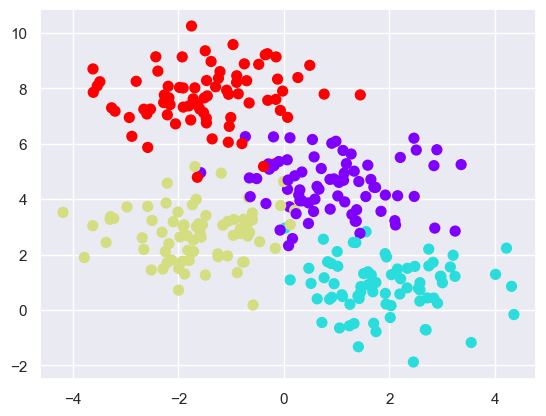

In [34]:
# generate a dataset
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0) # n_features has a default value of 2

# change the values of the parameters in make_blobs and see what happens

# plot the dataset
# marker has a default value of 'o', as many colours as class labels and a size of 50
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow'); 

# use marker='^' by uncommenting the following:
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, marker='^', cmap='rainbow'); 

In [35]:
print(X.shape)
print(y.shape)

print(X[:5])
print(y[:5])

(300, 2)
(300,)
[[ 0.02458305  2.96215652]
 [-1.52392631  7.12573205]
 [ 1.27450825  5.63017322]
 [-0.86552334  7.80121774]
 [ 0.74874067  2.55579434]]
[1 3 0 3 1]


### Create and visualise a decision tree classifier

We can fit a simple decision tree classifier to this dataset, which will iteratively split the data along one or the other axis using a cut-off value as a quantitative criterion, and at each level assign the label of the new region according to a majority vote of data points within it.

### Define a function for visualising the output of a classifier

This function takes as input a model, X, y, a colour map, fits the model to the dataset, and draw the decision boundary. 

**This is a very useful function that can be used for visualising the output of a classifier.**

**Find out any of the functions or parameters that you don't know**

In [36]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    # Get the current Axes instance on the current figure matching the given keyword args, or create one.
    ax = ax or plt.gca() 
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3) 
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

### Visualise the output of the classifier to the maximum depth

In this case, a decision tree is created as the classifier and visualised with no depth being specified explicitly. As we can see the decision tree is clearly over-fitting on the dataset.

C:\Users\Spoon\AppData\Local\Temp\ipykernel_16876\3772480835.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


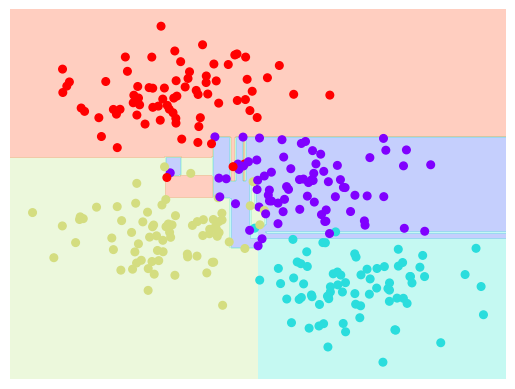

In [37]:
from sklearn.tree import DecisionTreeClassifier # import the decision tree classifier
visualize_classifier(DecisionTreeClassifier(), X, y)

### Visualise the output of the classifier to different depths

The figure below presents a visualisation of the output by a decision tree classifier fitted on this dataset to each of the first four depths.

C:\Users\Spoon\AppData\Local\Temp\ipykernel_16876\3772480835.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
C:\Users\Spoon\AppData\Local\Temp\ipykernel_16876\3772480835.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
C:\Users\Spoon\AppData\Local\Temp\ipykernel_16876\3772480835.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
C:\Users\Spoon\AppData\Local\Temp\ipykernel_16876\3772480835.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


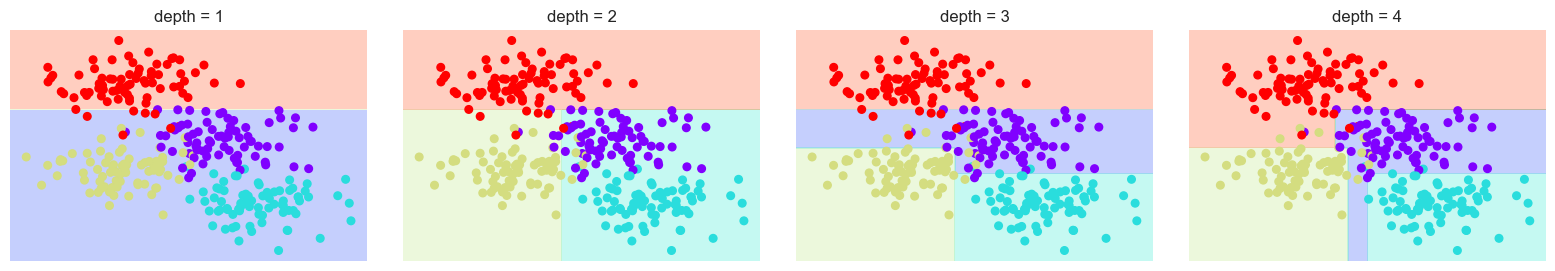

In [38]:
fig, ax = plt.subplots(1, 4, figsize=(16, 3)) # create a figure with 4 axes
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth) # the depth of a decision tree can be given
    visualize_classifier(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

fig.savefig('decision-tree-levels.png')


### Create and draw a decision tree

The decision tree can be fitted to a certain depth, e.g. 2, 3, or 4. 

Once trained, we can plot the tree with the plot_tree function. For further information on ftiing and plot decision trees, inclduing plotting the decision boundary and the tree itself,  refer to:

https://scikit-learn.org/stable/modules/tree.html#tree

We can compare a tree with the corresponding visualisation of the classifier to better understand how the dataset is split at each split. For example, at depth = 2, the tree can split/classify the dataset into 3 classes. We can see the splitting values at the two levels.

[Text(0.6, 0.8333333333333334, 'x[1] <= 6.261\ngini = 0.75\nsamples = 300\nvalue = [75, 75, 75, 75]'),
 Text(0.4, 0.5, 'x[0] <= -0.422\ngini = 0.686\nsamples = 232\nvalue = [75, 75, 75, 7]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.227\nsamples = 80\nvalue = [5, 0, 70, 5]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.543\nsamples = 152\nvalue = [70, 75, 5, 2]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 68\nvalue = [0, 0, 0, 68]')]

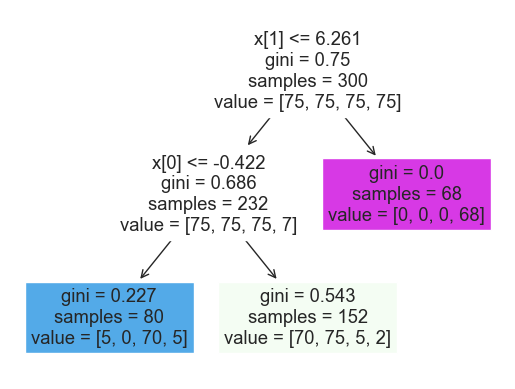

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier(max_depth=2).fit(X, y) # to a depth of 2

# model = DecisionTreeClassifier(max_depth=3).fit(X, y) # to a depth of 3

# model = DecisionTreeClassifier(max_depth=4).fit(X, y) # to a depth of 4

tree.plot_tree(model, filled=True)

## Exercise 1: Decision Trees

- What's the class label of each leaf node in the above decision tree? How is it decided?
- How is the splitting feature selected at each splitting point?
- What are the parameters in the DecisionTreeClassifier function? How do their values affect the output of the classifier? 


## Tutorial 2: Bagging

### Ensembles of  Decison Tree classifiers: Bagging

Bagging makes use of an ensemble of estimators, each of which overfits on a subset of the data, and aggregates the results to find a better classification.

In this case, we have randomised the traning dataset by fitting each decision tree on a random subset of the training points at 80%. We have used the BaggingClassifier to create and ensemble of the decision trees.

As we can see the classification results by the ensemble is slightly better than an individual decision tree because of the dataset randomisation, though not very much better.

C:\Users\Spoon\AppData\Local\Temp\ipykernel_16876\3772480835.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


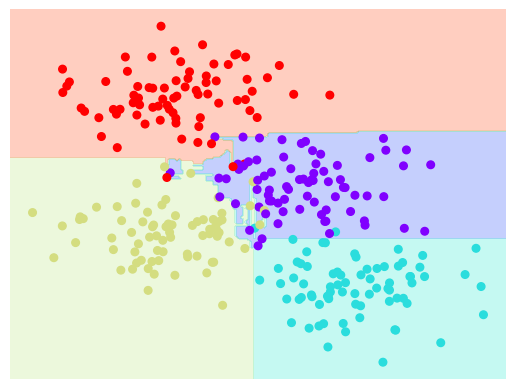

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

## Exercise 2.  Bagging

### Create a bagging classifier using the SVM as the base classifiers.

Create a bagging classifier of SVM base classifiers that are fitted on different random subsets of the data, and compare the results with the bagging classifer of the decision trees above.

### Answer the following questions:

- What are the parameters in the BaggingClassifier function? How do their values affect the output of the classifier?

## Tuorial 3. Random Forests

In practice, in addition to data randomisation as when the bagging classifier is ued, another kind of randomisation can also be introduced by injecting some stochasticity in how the splitting features are chosen at the splits. For example, when determining which feature to split on, the randomised tree might select from among the top several features.

In Scikit-Learn, such an optimised ensemble of randomized decision trees is implemented in the RandomForestClassifier estimator, which takes care of all the randomisation automatically. All you need to do is select a number of estimators, and it will very quickly fit the ensemble of trees.

C:\Users\Spoon\AppData\Local\Temp\ipykernel_16876\3772480835.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


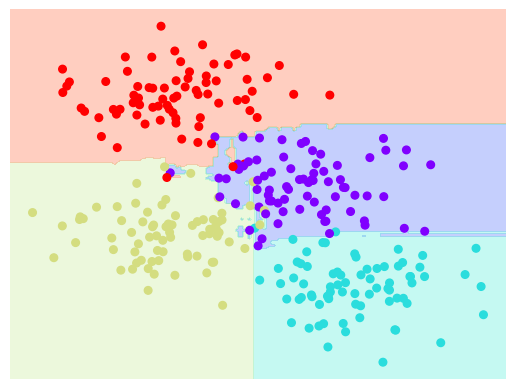

In [41]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)

visualize_classifier(model, X, y);

With aggregating over 100 randomly perturbed models, we end up with an overall model that is much closer to our intuition about how the space should be split.

## Exercise 3. Parameter Tuning in bagging classifiers and random forest classifiers

There are parameters in these classifiers that need to be tuned. When creating bagging classifers the main parameters are *n_estimators* and *max_samples*. When creating random forests the main parameters are *n_estimators*, *max_features* and *max_samples*. 

n_estimators is the number of base classifiers. The larger the better, but also the longer it will take to compute. In addition, note that results will stop getting significantly better beyond a critical number of trees in a random forest. 

max_samples is the size of the random subsets of data. The lower the size the greater reduction of variance, but also the greater increase in bias. 

max_features is the size of the random subsets of features to consider when splitting a node in a base decision tree classifier. The lower the greater the reduction of variance, but also the greater the increase in bias.

In a random forest, the level of the decision trees can also be selected.

Even in a voting classifier, the base classifiers can also be selected with different ensembles produce different levels of performance.

There are also other paramters in these classifiers that can be tuned. For further information on the parameters in these classifiers, refer to information on each classifier in sklearn:

https://scikit-learn.org/stable/modules/ensemble.html

*In all the cases, the best parameter values should always be selected by cross validation*. For further information on performance evaluation, refer to model selection and evaluation in sklearn:

https://scikit-learn.org/stable/model_selection.html

C:\Users\Spoon\AppData\Local\Temp\ipykernel_16876\3772480835.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


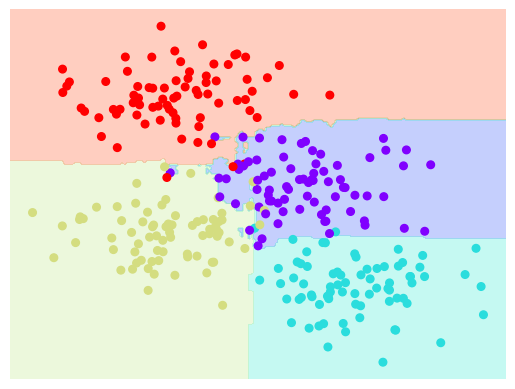

In [42]:
from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(n_estimators=100, random_state=0)

# try different values of parameters
# model = RandomForestClassifier(n_estimators=100, max_features="sqrt", random_state=0)

# model = RandomForestClassifier(n_estimators=100, max_features="log2", random_state=0)

model = RandomForestClassifier(n_estimators=100, max_features="sqrt", max_samples=0.6)

visualize_classifier(model, X, y);

## Example: A Random Forest for Classifying Digits

### Load a toy dataset

We first load a toy dataset from sklearn. scikit-learn comes with a few small standard datasets that do not require to download any file from some external website.

These datasets are useful to quickly illustrate the behaviour of the various algorithms implemented in scikit-learn. They are however often too small to be representative of real world machine learning tasks.

For more information on the toy datasets in sklearn, refer to:

https://scikit-learn.org/stable/datasets/toy_dataset.html

In [43]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

### Visualize the first few data points

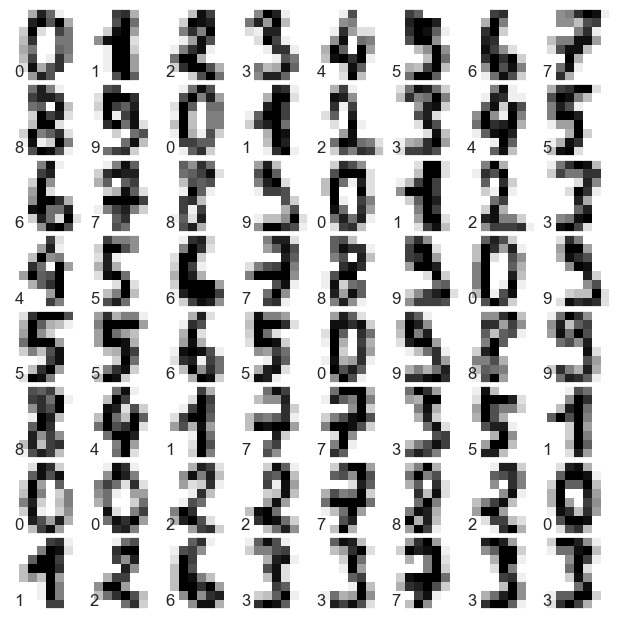

In [44]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

### Classify the digits using a random forest

You can use cross_val_score to show a performance metrics. You can slect a different number of estimators and a different number of iterations in cross validation.

In [49]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=100)
print(digits.data.shape)
scores = cross_val_score(model, digits.data, digits.target, cv=4)
scores

(1797, 64)


array([0.94666667, 0.9064588 , 0.97104677, 0.91982183])

It is possible to get a different score instead of the default one. For example, we can get the accuracy at each iteration of cross validation.

In [46]:
scores = cross_val_score(model, digits.data, digits.target, scoring='accuracy', cv=5)
scores

array([0.925     , 0.90277778, 0.95821727, 0.95543175, 0.92200557])

You can try to get a different score.

For more information, refer to:
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


In [47]:
scores = cross_val_score(model, digits.data, digits.target, scoring='recall_micro', cv=5)
scores

array([0.93055556, 0.91111111, 0.96100279, 0.96100279, 0.93036212])

In [48]:
scores = cross_val_score(model, digits.data, digits.target, scoring='precision_micro', cv=5)
scores

array([0.92222222, 0.90555556, 0.96657382, 0.95543175, 0.93036212])

## Exercise 4. Random Forests

### Fit, use and evaluate a random forest classifier on the breast cancer dataset and compare with the decision tree model.

This is another toy dataset in scikit-learn. For more information on the dataset, refer to:

https://scikit-learn.org/stable/datasets/toy_dataset.html